In [1]:
# import libraries
from pathlib import Path
import pandas as pd
import funconnect
from funconnect.visualization import common_input
from funconnect.utility.plot import rcParams
from matplotlib import pyplot as plt

plt.rcParams.update(rcParams.arial_desat)


# Get the install directory of funconnect
funconnect_dir = Path(funconnect.__file__).parent.parent
result_dir = funconnect_dir / "results" / "common_inputs"

# load results
try:
    pre_mean_corr = pd.read_feather(result_dir / "pre_mean_corr.feather")
    stats_results = pd.read_csv(result_dir / "stats_results.csv")
except FileNotFoundError:
    raise FileNotFoundError(
        "Analysis results not found, please run the analysis first with `run_analysis.py`"
    )


 # Figure 5c

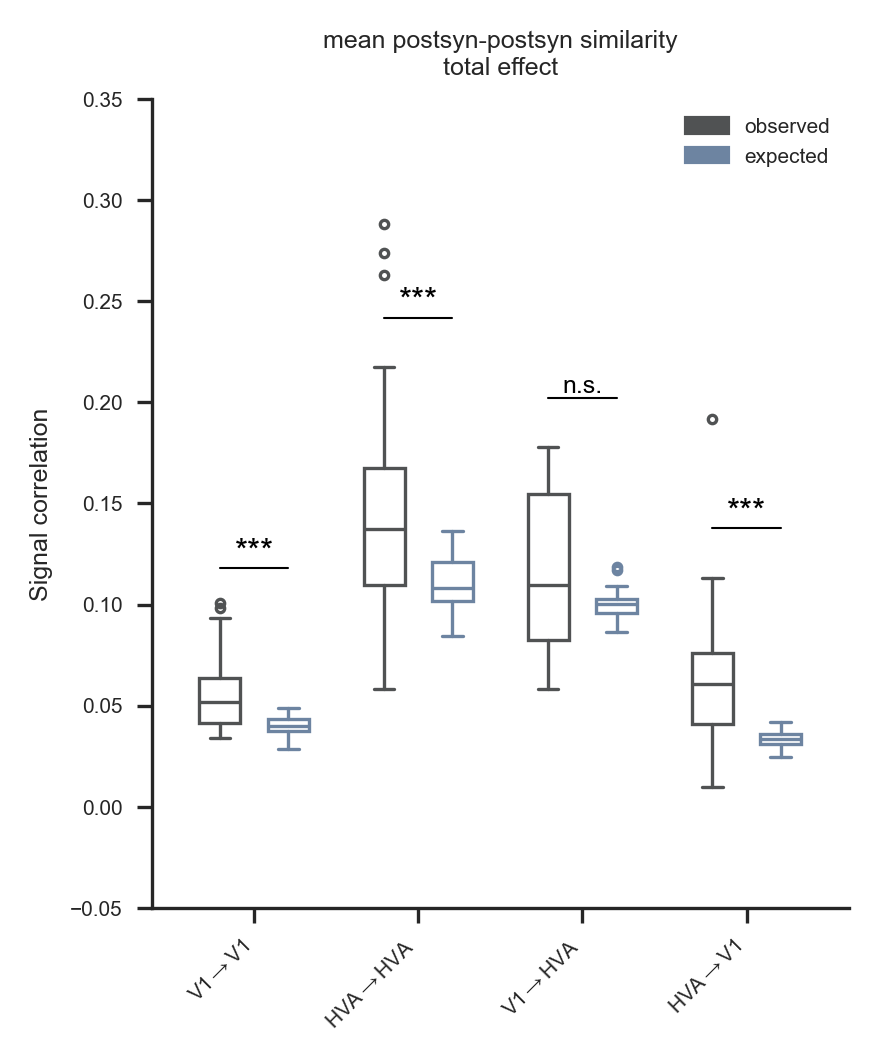

In [2]:
stats_results_plot = stats_results.query("effect == 'total effect' and type == 'post'")
weights = stats_results_plot["contrast"].unique()[0].split(" vs ")
pre_mean_corr_plot = pre_mean_corr.query("weight in @weights and type == 'post'")
common_input.plot_common_input_boxplot(
    stats_results_plot,
    pre_mean_corr_plot,
)
